In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [12]:
#训练
def LinearRegression_fit(x_train,y_train):
    #进行断言，保证 x_train,y_train 是一一对应的关系
    assert x_train.shape[0] == y_train.shape[0], \
        "the size of x_train must be equals to the size of y_train"
    #  hstack水平的把数组拼接  
    x_b=np.hstack([np.ones( (len(x_train),1) ),x_train])
    #  np.linalg.inv 将矩阵 变为逆阵       theta=[a0+a1+a2+....+aN]
    theta=np.linalg.inv((x_b.T).dot(x_b)).dot(x_b.T).dot(y_train)
    # 特征列表      
    return theta

def LinearRegression_pre(x_pre,theta):
    '''
    x_pre : 带预测数据集
    theta   特征
    '''
    x_b=np.hstack([np.ones( (len(x_pre),1) ),x_pre])
    return x_b.dot(theta)

In [23]:
from sklearn.datasets import load_boston 
from sklearn.cross_validation import train_test_split
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [14]:
boston=load_boston()
X=boston.data
y=boston.target

In [20]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1,random_state=33)

In [21]:
theta=LinearRegression_fit(X_train,y_train)
y_pre=LinearRegression_pre(X_test,theta)
y_pre

array([ 20.45993749,  11.60920032,  12.89096279,  18.07771383,
        22.83545673,  20.9491449 ,  36.62380506,  14.5885122 ,
        22.85276886,  22.4805394 ,  24.79392184,  36.76106442,
         4.55854886,  25.69585396,  11.5540423 ,  23.81582885,
        17.09991941,  18.37438673,  32.33379759,  22.75118417,
        12.56298263,  20.00575882,  18.42063673,  18.79370284,
        34.05508931,  15.61201141,  25.7911889 ,  24.98714297,
        11.36186893,  34.75212851,  16.71031474,  25.9179321 ,
         5.87260043,  16.252907  ,  30.32532712,  33.3849224 ,
        25.33256108,   5.71400295,  19.589365  ,  29.28877452,
        17.88813282,  12.78739801,  30.27290408,  16.07024142,
        30.53869301,  20.11281547,  20.82415797,  17.61992712,
        23.92076655,  21.24839436,  17.37729757])

In [22]:
y_test

array([ 20.5,   5.6,  13.4,  12.6,  21.2,  19.7,  32.4,  14.8,  33. ,
        21.4,  30.1,  36. ,   8.4,  21.6,  16.3,  23. ,  14.9,  14.1,
        31.1,  11.9,  12.7,  27.9,  20.8,  19.6,  32. ,  21.9,  23.2,
        23.8,  10.8,  34.9,  19.1,  26.5,  10.5,  17.5,  24. ,  36.1,
        25.3,  13.8,  27.5,  24.6,  12.7,   9.5,  32.7,  13.8,  23.5,
        17.7,  15.6,  22.5,  26.2,  20.6,  14.1])

In [25]:
#使用  R-squared   MSE  MAE  三种指标对平均回归配置的K近邻模型在测试集上进行性能评估
print(r2_score(y_test,y_pre))    #顺序不能变
print('MSE 评分：',
     mean_squared_error(y_test ,y_pre))
print('MAE 评分：',
     mean_absolute_error(y_test,y_pre ) )

0.690044691844
MSE 评分： 18.3780855864
MAE 评分： 3.33912590499


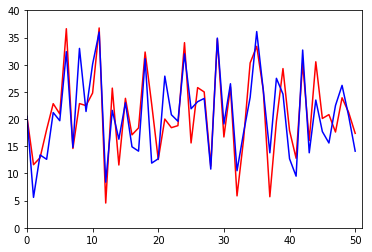

In [33]:
#用直线的形式将预测与实际值绘制出来
a=[]
for i in range(y_test.size):
    a.append(i)
x=np.array(a,dtype = int)
plt.plot(x,y_pre,color='r')
plt.plot(x,y_test,color='blue')
plt.axis([0,x.size,0,40])
plt.show()